In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Необходимо удостовериться в имеющихся типах данных и привести типы данных к одному из понятных в случае, если встретим тип object

In [4]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# Определим имена столбцов, тип данных которых object
objects_names = train_data.axes[1][train_data.dtypes == object]

# Приведем столбцы (переменные) на позициях к типу данных категорий
train_data[objects_names] = train_data[objects_names].astype('category')

test_data[objects_names] = test_data[objects_names].astype('category')

train_data.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object

Попробуем осмотреть таблицу описательных статистик с целью:

Определить какие столбцы являются столбцами с числовыми данными
Просмотреть описательные статистики на наличие аномалий в столбцах
Находим пропуски значений в столбце LotFrontage и MasVnrArea. Необходимо также удостовериться в отсутствии пропусков в других столбцах более точными способами

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Пропуски значений в столбцах таблицы данных
np.array(np.sum(train_data.isna()))

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  872,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0])

In [8]:
# Имена числовых переменных
info_real_columns = train_data.describe().columns[1:]
info_real_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
train_data_num = train_data[info_real_columns]

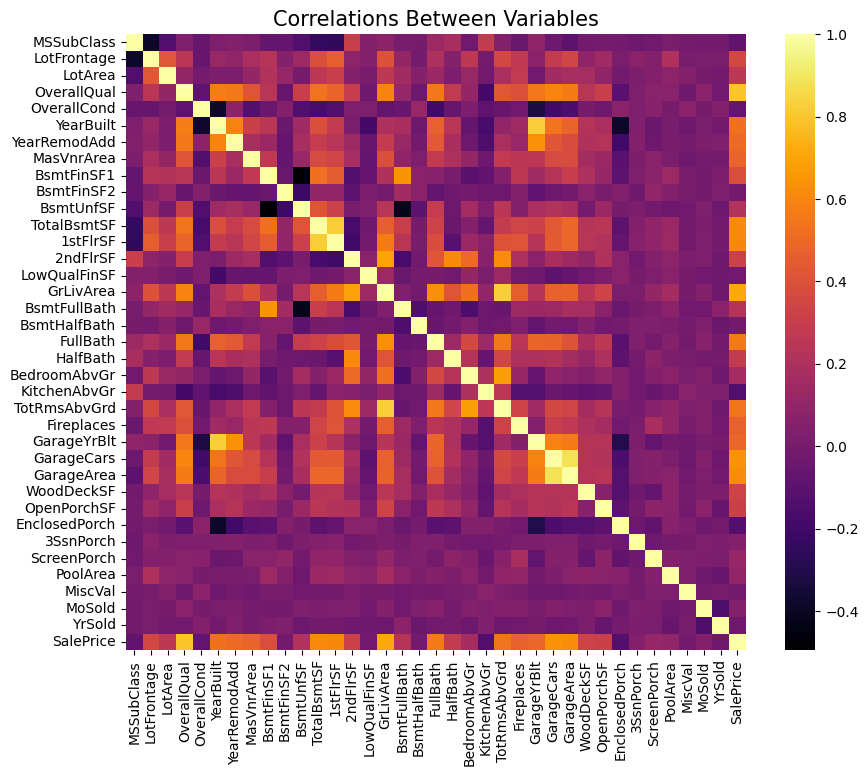

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(train_data_num.corr(), cmap="inferno")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [11]:
sales_correlations = train_data_num.corr().iloc[-1, :-1]
sales_correlations = sales_correlations.sort_values() 
print(sales_correlations)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64


In [12]:
sales_predictors_labels = sales_correlations.axes[0]
print(sales_predictors_labels)

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch',
       'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', 'BsmtUnfSF',
       'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF', '2ndFlrSF',
       'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea',
       'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath',
       '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual'],
      dtype='object')


In [13]:
X = train_data_num[sales_predictors_labels]
Y = train_data_num[sales_correlations.name]
print(X.shape)
print(Y.shape)

(1460, 36)
(1460,)


In [14]:
np.sum(X.isna())

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


KitchenAbvGr       0
EnclosedPorch      0
MSSubClass         0
OverallCond        0
YrSold             0
LowQualFinSF       0
MiscVal            0
BsmtHalfBath       0
BsmtFinSF2         0
3SsnPorch          0
MoSold             0
PoolArea           0
ScreenPorch        0
BedroomAbvGr       0
BsmtUnfSF          0
BsmtFullBath       0
LotArea            0
HalfBath           0
OpenPorchSF        0
2ndFlrSF           0
WoodDeckSF         0
LotFrontage      259
BsmtFinSF1         0
Fireplaces         0
MasVnrArea         8
GarageYrBlt       81
YearRemodAdd       0
YearBuilt          0
TotRmsAbvGrd       0
FullBath           0
1stFlrSF           0
TotalBsmtSF        0
GarageArea         0
GarageCars         0
GrLivArea          0
OverallQual        0
dtype: int64

In [15]:
X = X.interpolate(Axis = 1)

In [16]:
np.sum(X.isna())

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


KitchenAbvGr     0
EnclosedPorch    0
MSSubClass       0
OverallCond      0
YrSold           0
LowQualFinSF     0
MiscVal          0
BsmtHalfBath     0
BsmtFinSF2       0
3SsnPorch        0
MoSold           0
PoolArea         0
ScreenPorch      0
BedroomAbvGr     0
BsmtUnfSF        0
BsmtFullBath     0
LotArea          0
HalfBath         0
OpenPorchSF      0
2ndFlrSF         0
WoodDeckSF       0
LotFrontage      0
BsmtFinSF1       0
Fireplaces       0
MasVnrArea       0
GarageYrBlt      0
YearRemodAdd     0
YearBuilt        0
TotRmsAbvGrd     0
FullBath         0
1stFlrSF         0
TotalBsmtSF      0
GarageArea       0
GarageCars       0
GrLivArea        0
OverallQual      0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error

seed=123
test_ratio = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)

print("Размер выборки для тренировки и кросс-валидации", X_train.shape) 
print("Размер откликов для тренировки и кросс-валидации", Y_train.shape)

Размер выборки для тренировки и кросс-валидации (1168, 36)
Размер откликов для тренировки и кросс-валидации (1168,)


In [18]:
model_lm = LinearRegression()           # Объект класса
model_lm.fit(X_train, Y_train)          # Метод обучение
print("Coefficients weights: ", model_lm.coef_, "\n")
print("R2 on train sample is", model_lm.score(X_train, Y_train))

Coefficients weights:  [-8.73285618e+03  5.70940547e+00 -1.96323360e+02  3.64741208e+03
 -5.72372529e+02 -1.46815334e+01 -4.93881350e-01  3.06849865e+03
  1.75897497e-01  1.53707889e+01  6.46233845e+01 -1.84848128e+01
  3.72633195e+01 -9.39149740e+03 -1.62919660e+00  8.64331512e+03
  4.16925511e-01 -3.03749920e+03  1.08038405e+00  2.07784833e+01
  2.45914971e+01 -1.13337910e+02  1.01560319e+01  5.28838119e+03
  2.75823062e+01  9.52209482e+01  1.60643937e+02  2.68948883e+02
  4.42180805e+03  2.72420629e+03  2.14815415e+01  8.70273283e+00
 -1.39965809e+01  1.43348577e+04  2.75784914e+01  1.75949819e+04] 

R2 on train sample is 0.8043029445018925


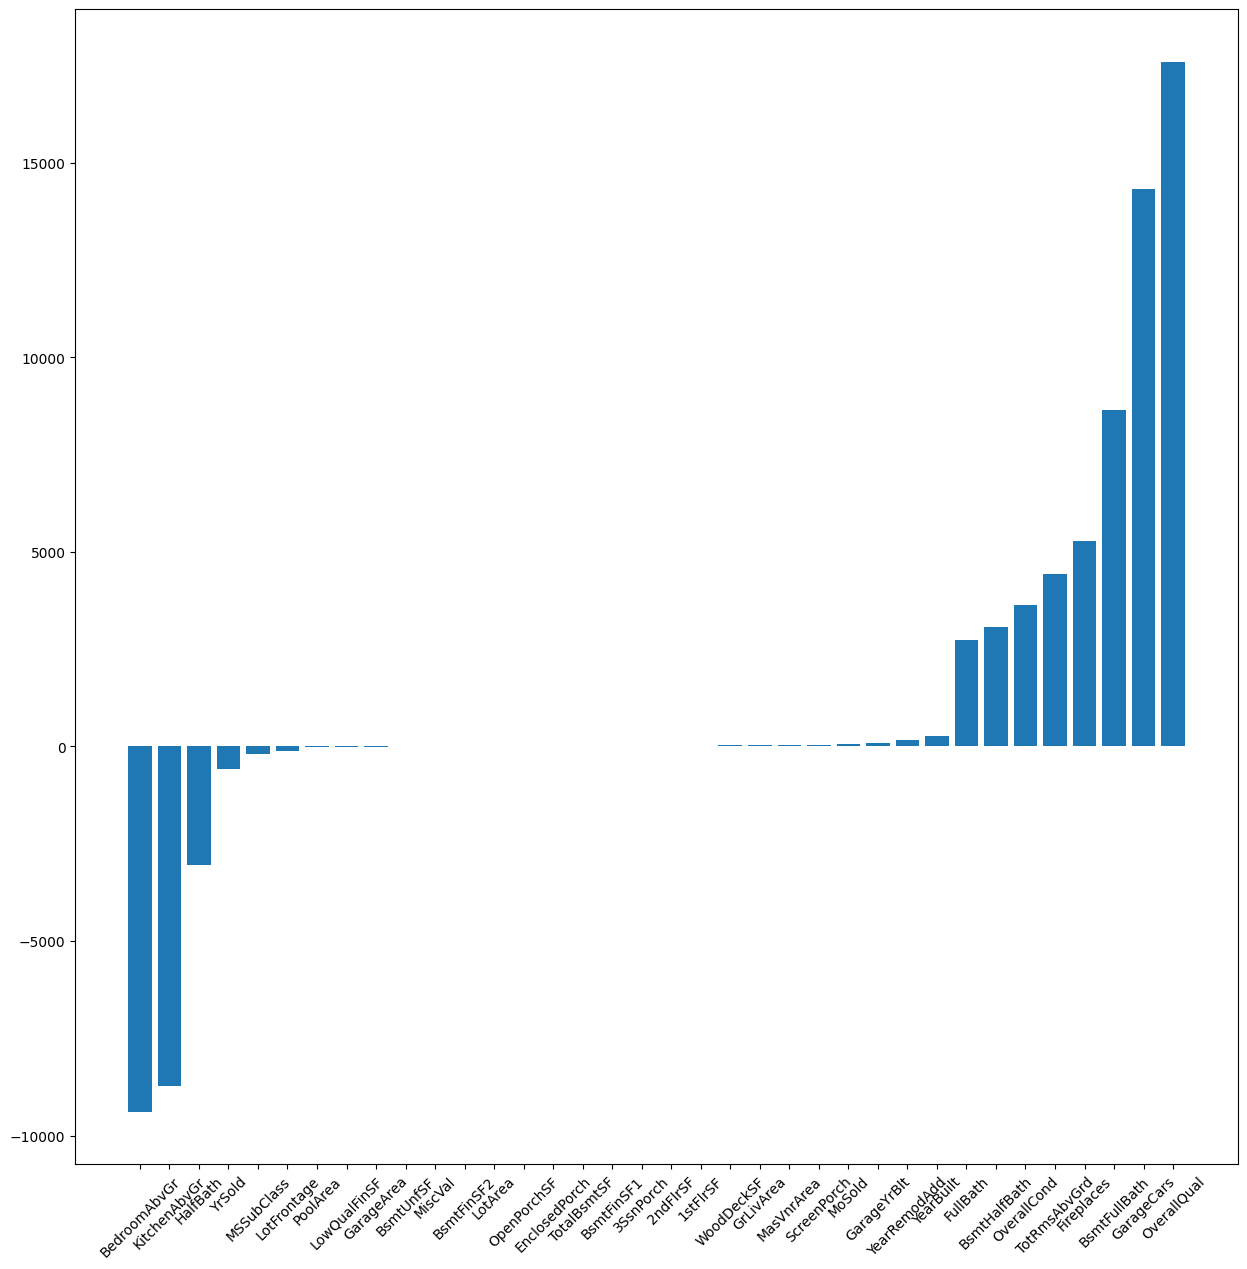

In [19]:
plt.figure(figsize = (15, 15))
model_coeffs = pd.Series(data = model_lm.coef_, index=sales_predictors_labels)
plt.bar(x = model_coeffs.sort_values().axes[0], height = model_coeffs.sort_values())

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

plt.show()

In [20]:
preds = model_lm.predict(X_test)
R2_real = r2_score(Y_test, preds)
print(R2_real)

0.8421788031363046


In [21]:
MAE_real = mean_absolute_error(Y_test, preds)
print(MAE_real)

19274.536723633933


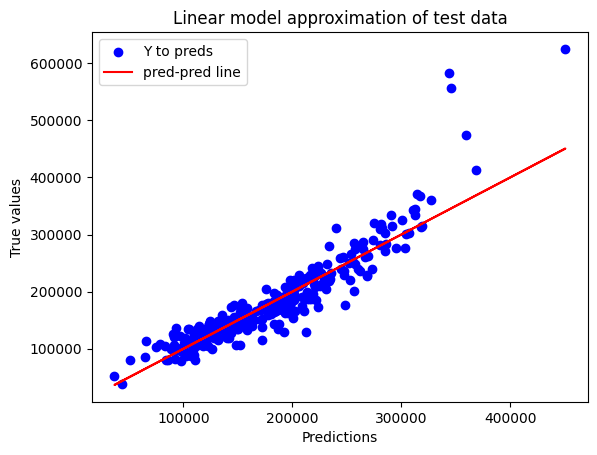

In [22]:
plt.scatter(preds, Y_test, c = 'b', label = 'Y to preds')
plt.plot(preds, preds, c = 'r', label = 'pred-pred line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data")
plt.legend()
plt.show()

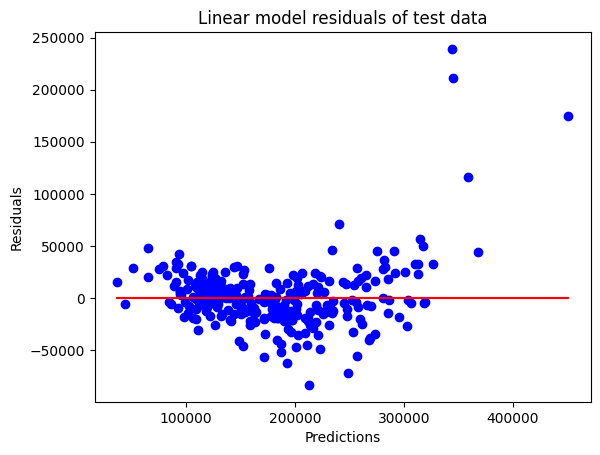

In [23]:
plt.scatter(preds, Y_test - preds, c = 'b')
plt.plot(preds, np.zeros_like(preds), c = 'r')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Linear model residuals of test data")
plt.show()

In [24]:
seed=123
test_ratio = 0.2

r2_history_train = []
r2_history_test = []
pred_names = []
preds_y = []
models = []
predictors = np.arange(1, len(sales_correlations) + 1)

X = train_data_num[sales_predictors_labels]
Y = train_data_num[sales_correlations.name]
X = X.interpolate(Axis = 1)


for predictor_name in sales_predictors_labels[::-1]:
    pred_names.append(predictor_name)
    X_trace = X[pred_names]

    X_train, X_test, Y_train, Y_test = train_test_split(X_trace, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)
    model_lm = LinearRegression()
    model_lm.fit(X_train, Y_train)
    
    preds = model_lm.predict(X_test)
    models.append(model_lm)
    
    preds_y.append(preds)
    r2_history_train.append(model_lm.score(X_train, Y_train))
    r2_history_test.append(model_lm.score(X_test, Y_test))

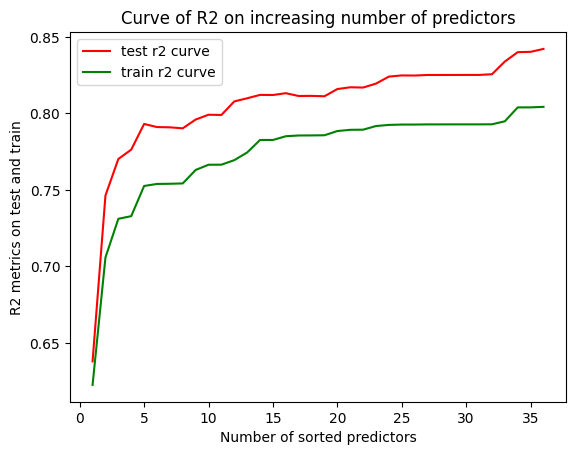

In [25]:
plt.plot(predictors, r2_history_test, c = "r", label = 'test r2 curve')
plt.plot(predictors, r2_history_train, c = "g", label = 'train r2 curve')
plt.xlabel("Number of sorted predictors")
plt.ylabel("R2 metrics on test and train")
plt.title("Curve of R2 on increasing number of predictors")
plt.legend()

**CATEGORIES**

In [26]:
dummies_objects = pd.get_dummies(train_data[objects_names], prefix=objects_names )
dataframe_with_dummies = train_data.join(dummies_objects)
dataframe_with_dummies.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,True,False,False,False,False,True,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,True,False,False,False,False,True,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,True,False,False,False,False,True,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,True,True,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,True,False,False,False,False,True,False


In [27]:
predictor_lasso_colnames = dataframe_with_dummies.describe().axes[1]
# Хотелось бы без переприсваивания, но без него не работает
predictor_lasso_colnames = predictor_lasso_colnames.drop(['Id', 'SalePrice'])
print(predictor_lasso_colnames)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [28]:
# Выделение предикторов в отдельную таблицу
X = dataframe_with_dummies[predictor_lasso_colnames] 
X = X.interpolate(Axis=1)
print(X.shape)

# Выделение откликов в отдельную таблицу
Y = dataframe_with_dummies['SalePrice']
print(Y.shape)

(1460, 36)
(1460,)


In [29]:
seed=123
test_ratio = 0.2
cv_parts = 4

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)

print("Размер выборки для тренировки и кросс-валидации", X_train.shape) 
print("Размер откликов для тренировки и кросс-валидации", Y_train.shape)

Размер выборки для тренировки и кросс-валидации (1168, 36)
Размер откликов для тренировки и кросс-валидации (1168,)


**LASSO**

In [30]:
model_LASSO_cv = LassoCV(eps = 0.00001, n_alphas = 10000, cv = 4, random_state = seed)
model_LASSO_cv.fit(X_train, Y_train)

LassoCV(cv=4, eps=1e-05, n_alphas=10000, random_state=123)

In [31]:
model_LASSO_cv.score(X_train, Y_train)

0.7928098390903546

In [32]:
model_LASSO_cv.score(X_test, Y_test)

0.8342120385862843

In [33]:
lasso_preds = model_LASSO_cv.predict(X_test)
MAE_lasso_dummies = mean_absolute_error(Y_test, lasso_preds)
MAE_lasso_dummies

19052.773151728423

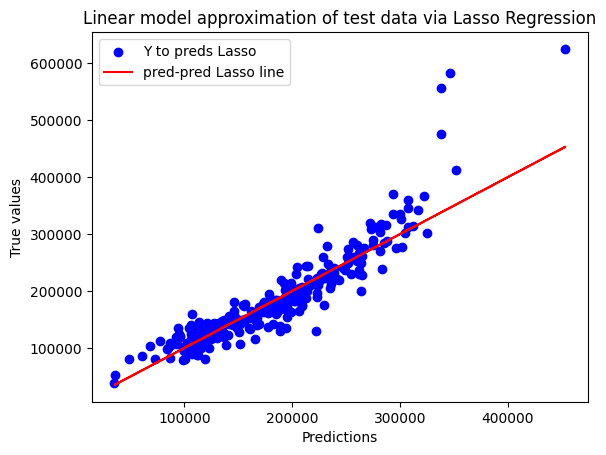

In [34]:
plt.scatter(lasso_preds, Y_test, c = 'b', label = 'Y to preds Lasso')
plt.plot(lasso_preds, lasso_preds, c = 'r', label = 'pred-pred Lasso line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Lasso Regression")
plt.legend()
plt.show()

**RIDGE**

In [35]:
model_RIDGE_cv = RidgeCV(alphas = np.linspace(9, 11, 300), cv = 4)
model_RIDGE_cv.fit(X_train, Y_train)
model_RIDGE_cv.best_score_

0.731885114662816

In [36]:
model_RIDGE_cv.alpha_

9.0

In [37]:
model_RIDGE_cv.score(X_train, Y_train)

0.8042589921717404

In [38]:
model_RIDGE_cv.score(X_test, Y_test)

0.8423587574048077

In [39]:
ridge_preds = model_RIDGE_cv.predict(X_test)
MAE_ridge_dummies = mean_absolute_error(Y_test, ridge_preds)
MAE_ridge_dummies

19220.036760055504

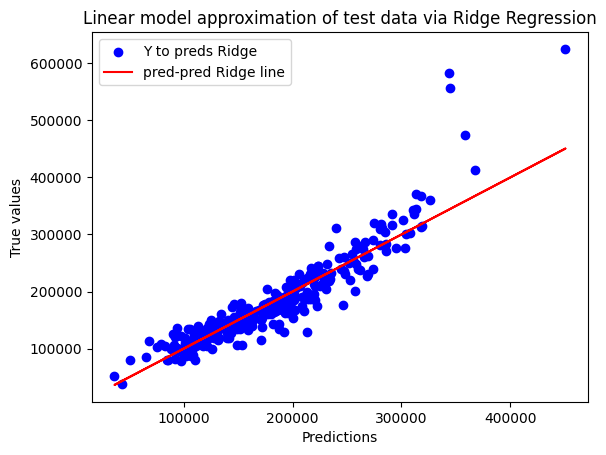

In [40]:
plt.scatter(ridge_preds, Y_test, c = 'b', label = 'Y to preds Ridge')
plt.plot(ridge_preds, ridge_preds, c = 'r', label = 'pred-pred Ridge line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Ridge Regression")
plt.legend()
plt.show()

In [41]:
# Коэффициенты модели
model_RIDGE_cv.coef_

array([-1.98550545e+02, -1.17058212e+02,  4.21050364e-01,  1.75521662e+04,
        3.60799990e+03,  2.74752082e+02,  1.69751647e+02,  2.76623078e+01,
        1.03533973e+01,  3.97791275e-01, -1.77072702e+00,  8.98046179e+00,
        2.12785146e+01,  2.08245102e+01, -1.42863831e+01,  2.78166433e+01,
        8.06236871e+03,  2.34893851e+03,  2.45279031e+03, -2.88344416e+03,
       -9.13445714e+03, -6.92318929e+03,  4.22238887e+03,  5.37862182e+03,
        9.32346975e+01,  1.33979077e+04, -1.10417814e+01,  2.50417562e+01,
        1.08715254e+00,  6.38636929e+00,  1.63660424e+01,  3.80073891e+01,
       -1.90556482e+01, -5.73362487e-01,  6.18527314e+01, -5.82753924e+02])

In [42]:
# Стартовая цена дома, при всех предикторах == 0
model_RIDGE_cv.intercept_

59971.0012515132

In [43]:
print("Средняя абсолютная ошибка по линейной модели с числовыми предикторами", MAE_real)
print("Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами", MAE_lasso_dummies)
print("Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами", MAE_ridge_dummies)

Средняя абсолютная ошибка по линейной модели с числовыми предикторами 19274.536723633933
Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами 19052.773151728423
Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами 19220.036760055504


In [44]:
model_RIDGE_cv = RidgeCV(alphas = np.linspace(9, 11, 300), cv = 4)
model_RIDGE_cv.fit(X, Y)

dummies_objects = pd.get_dummies(test_data[objects_names], prefix=objects_names )
dataframe_with_dummies = test_data.join(dummies_objects)
dataframe_with_dummies.head()

predictor_lasso_colnames = dataframe_with_dummies.describe().axes[1]

predictor_lasso_colnames = predictor_lasso_colnames.drop(['Id'])

X = dataframe_with_dummies[predictor_lasso_colnames] 
X = X.interpolate(Axis=1)

test_predictions = model_RIDGE_cv.predict(X)

submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)